# Quickstart AltaiPony: De-trend and find flares

Let's first get the base class and the IO function we want to use:

In [1]:
from altaipony.flarelc import FlareLightCurve
from altaipony.lcio import from_TargetPixel_source

/usr/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Loading KWallet
Loading SecretService
Loading Windows
Loading chainer
Loading macOS
/usr/lib/python3.6/importlib/_bootstrap.py:371: ResourceWarning: unclosed <socket.socket fd=58, family=AddressFamily.AF_UNIX, type=SocketKind.SOCK_STREAM, proto=0, raddr=/run/user/1000/bus>
  self.name = name
/usr/lib/p

Now download a **K2SC** light curve from archive and create a ``FlareLightCurve``.

(It's enough to pass the EPIC ID to ``from_TargetPixel_source``, but you could pass a path instead as well.)

In [2]:
EPIC = 211983544

flc = from_TargetPixel_source(EPIC)

Target data identifier must be unique. Provide campaign or cadence.


In [3]:
flc = from_TargetPixel_source(EPIC, campaign=18)

Found cached file /home/ekaterina/.lightkurve-cache/mastDownload/K2/ktwo211983544-c18_lc/ktwo211983544-c18_lpd-targ.fits.gz with expected size 1538929.
5% (119/2490) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (119/2490) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Let's verify that we succeeded:

In [4]:
flc

FlareLightCurve(ID: 211983544)

The representation tells us that we have indeed created a ``FlareLightCurve``.

Now let's look at some cool tools we inherited from the awesome [``lightkurve``](https://github.com/KeplerGO/lightkurve) package:

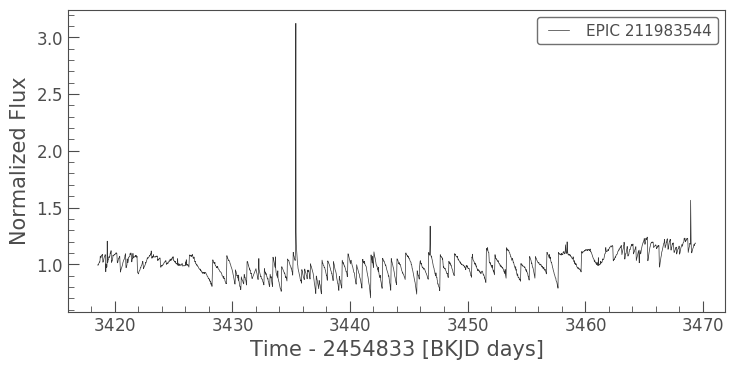

In [5]:
flc.plot()

This is the raw light curve. The is intrumental noise but also stellar variability. Let's remove it with K2SC:

In [6]:
flc = flc.detrend()

Starting initial outlier detection at 3sigma.
iteration 1 at normalized median flux1.00000 \pm 0.01695
iteration 2 at normalized median flux1.00009 \pm 0.01653
iteration 3 at normalized median flux1.00009 \pm 0.01650
iteration 4 at normalized median flux1.00009 \pm 0.01650
iteration 5 at normalized median flux1.00009 \pm 0.01650
iteration 6 at normalized median flux1.00009 \pm 0.01650
iteration 7 at normalized median flux1.00009 \pm 0.01650
iteration 8 at normalized median flux1.00009 \pm 0.01650
iteration 9 at normalized median flux1.00009 \pm 0.01650
iteration 10 at normalized median flux1.00009 \pm 0.01650
  Flagged 66 ( 2.8%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =    1.69 (fap 3.0490e-255 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
  DE iteration %3i -ln(L) %4.1f 0 -2837.3038045565104
  DE iteration %3i -ln(L) %4.1f 1 -2837.3038045565104
  DE iteration %3i -ln(L) %4.1f 2

De-trending successfully completed.


  CDPP - raw - %6.3f 36888.7541454433
  CDPP - position component removed - %6.3f 7209.95366950788
  CDPP - full reduction - %6.3f 2396.108420063557
Detrending time %6.3f 262.58257842063904


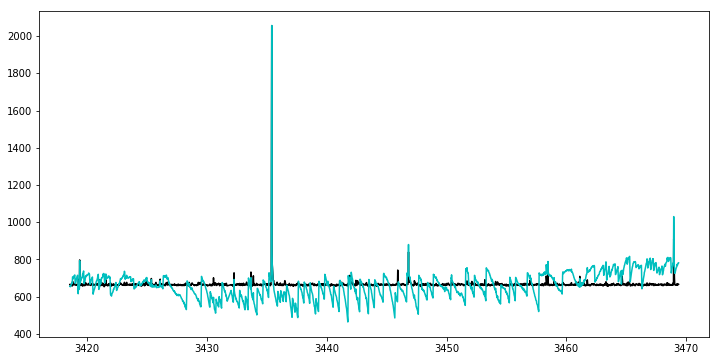

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(flc.time, flc.detrended_flux, c='k')
plt.plot(flc.time, flc.flux, c='c')

**K2SC** preserved flare signal, so this is what we use for flare finding.

So let us find the flares in this light curve (one, at least, is pretty obvious, right?)

In [12]:
flc = flc.find_flares()
flc.flares.sort_values(by="ed_rec", ascending=False)

,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop
2,2.096562,162792,162804,7412.890735,10.093002,775,787,3435.361892,3435.607075
11,0.370098,164437,164441,1640.926615,13.047073,2351,2354,3468.972071,3469.053797
6,0.265226,163352,163364,1101.670142,11.329776,1311,1323,3446.803711,3447.048891
4,0.076100,163113,163121,490.148215,14.071641,1080,1087,3441.920517,3442.083971
10,0.070744,164225,164229,342.766106,10.329573,2155,2159,3464.640564,3464.722291
7,0.070758,163916,163919,253.211149,8.785246,1858,1861,3458.327186,3458.388481
1,0.072356,162718,162722,245.807810,8.722508,704,708,3433.849930,3433.931658
8,0.100995,163923,163926,224.125570,6.737551,1865,1868,3458.470208,3458.531503
0,0.028526,162280,162285,170.430895,11.485043,296,301,3424.900708,3425.002868
5,0.032329,163145,163150,159.876192,11.015130,1111,1116,3442.574334,3442.676493


Aha! Some flare candidates. Let's see where they are in the light curve and zoom in on the big one:

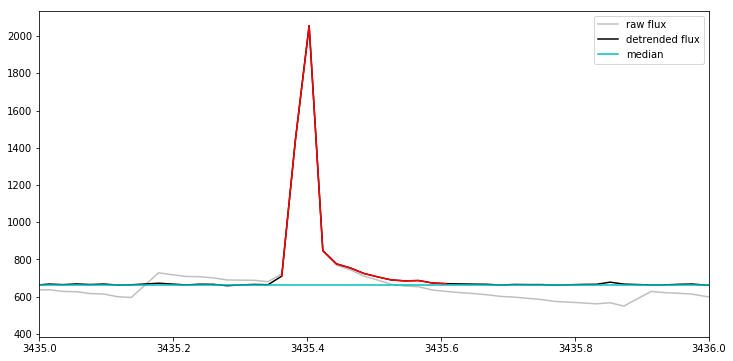

In [23]:
plt.figure(figsize=(12,6))
plt.plot(flc.time, flc.flux, c='grey', alpha=.5, label='raw flux')
plt.plot(flc.time, flc.detrended_flux, c='k', label='detrended flux')
plt.plot(flc.time, flc.it_med, c='c', label='median')
for i,f in flc.flares.iterrows():
    plt.plot(flc.time[f.istart:f.istop+1], flc.detrended_flux[f.istart:f.istop+1], c='r')
plt.xlim(3435,3436)
# plt.xlim(3464,3465) # uncomment to see a small candidate
# plt.ylim(600,900) # uncomment to see a small candidate zoomed in
plt.legend();

Not all of them are real, others are real but are detected only by chance. Here is where injecting synthetic signal comes in. But this is a story for a different notebook.

Questions? Something does not work? Email me @ eilin@aip.de 